# Generating Sample Data

In [2]:
# Imports
import numpy
import pandas

In [15]:

def generate_data():
    # Generate Random Data
    cluster_size = 1000 # number of data points in a cluster
    dimensions = 2

    # Cluster A random numbers
    cA_offset = (5,5)
    cA = pandas.DataFrame(numpy.random.rand(cluster_size, dimensions) + cA_offset, columns=["x", "y"])

    # Cluster B random numbers
    cB_offset = (1,1)
    cB = pandas.DataFrame(numpy.random.rand(cluster_size, dimensions) + cB_offset, columns=["x", "y"])

    # Cluster C random numbers
    cC_offset = (5,1)
    cC = pandas.DataFrame(numpy.random.rand(cluster_size, dimensions) + cC_offset, columns=["x", "y"])

    # Assign targets to the clusters
    cA["target"] = 0
    cB["target"] = 1
    cC["target"] = 2
    
    return cA, cB, cC


cA, cB, cC = generate_data()

# Show sample data
cA.head()

,x,y,target
0,5.968569,5.836820,0
1,5.019439,5.447868,0
2,5.259760,5.208250,0
3,5.031713,5.536781,0
4,5.529191,5.885032,0


(0, 7)

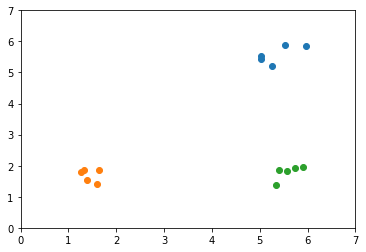

In [16]:
# Plot a small subset of the data
%matplotlib inline
import matplotlib.pyplot as plt

# Use head() to only plot some points
plt.scatter(cA['x'].head(), cA['y'].head())
plt.scatter(cB['x'].head(), cB['y'].head())
plt.scatter(cC['x'].head(), cC['y'].head())
plt.xlim([0, 7]) # show x-scale from 0 to 7
plt.ylim([0, 7])

In [17]:
# Concat all the input data (required for our neural network)
# ignore_index=True reindexes instead of keeping the existing indexes
# This makes sure we don't have repeating indexes
input_data = pandas.concat([cA, cB, cC], ignore_index=True)

# Shuffle data set: https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
# This makes sure we don't bias our neural network on the order things are inputted
input_data = input_data.sample(frac=1).reset_index(drop=True)
input_data.head() # Show sample from input_data

,x,y,target
0,5.112386,5.401045,0
1,1.941281,1.213089,1
2,5.732005,5.548541,0
3,1.940706,1.929806,1
4,5.959131,1.272917,2


# Building a Model

We're going to build a very simple neural network that looks like this
```
2 inputs -> [no hidden nodes] -> 3 outputs
```
The first input will correspond to the x-coordinate of each point, the second input to the y-coordinate.
The outputs will represent each of our target classes. In other words, the output will be a vector of dimension 3 containing probabilities that the given input corresponds to each of the target classes.

Example:

![Sample Neural Network](images/simple-nn.png)


In [18]:
import keras

# Before we build our model, we first need to manipulate our dataset a bit so that we can easily use it with Keras.

# For input layer, keras expects our dataset to be in the format: [[x1, y1], [x2, y2], [x3, y3], ...]
training_input = input_data[["x", "y"]].values

# For the output layer, keras expects the target classes to be one-hot encoded (https://en.wikipedia.org/wiki/One-hot)
# This basically means converting our list of target classes to a list with a vector for each of integer classes, 
# with a 1 on the position that corresponds to the integer representing the class
# e.g. [0, 1, 2, 0, ...] -> [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], ...] 
# Keras has a utility function to_categorical(...) that does exactly this
# Note: assumption is made that classes are labeled 0->n (starting a 0, no gaps)
training_output = keras.utils.to_categorical(input_data["target"].values)

training_input, training_output

(array([[ 5.11238584,  5.40104497],
        [ 1.94128135,  1.21308904],
        [ 5.73200533,  5.5485408 ],
        ..., 
        [ 5.33006595,  1.92798334],
        [ 5.94762255,  1.89685324],
        [ 1.05976974,  1.04793135]]), array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 1.,  0.,  0.],
        ..., 
        [ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        [ 0.,  1.,  0.]]))

In [19]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

# 1. BUILD MODEL
# Build model with 2 inputs and 3 outputs
# Use the softmax activation function to make sure our output vector has values between 0 and 1 
# (= probabilities of belonging to the respective class)
# Without the softmax function
a = Input(shape=(2,))
b = Dense(3, activation='softmax')(a)
model = Model(inputs=a, outputs=b)

# Alternative way to build model:
# model = Sequential()
# model.add(Dense(units=3, input_dim=2))

# 2. COMPILE MODEL
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Loss options:
#  - categorical_crossentropy -> For a multi-class classification problem
#  - binary_crossentropy      -> For a binary classification problem
#  - mse                      -> For a mean squared error regression problem
# Optimizer options:
#  - sgd -> Stochastic Gradient Descent
keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Training model
model.fit(training_input, training_output, epochs=20)

Epoch 1/20
3000/3000 [==============================] - 0s 115us/step - loss: 1.4292 - acc: 0.5057
Epoch 2/20
3000/3000 [==============================] - 0s 55us/step - loss: 0.5191 - acc: 0.7207
Epoch 3/20
3000/3000 [==============================] - 0s 60us/step - loss: 0.4443 - acc: 0.8350
Epoch 4/20
3000/3000 [==============================] - 0s 54us/step - loss: 0.3908 - acc: 0.9550
Epoch 5/20
3000/3000 [==============================] - 0s 52us/step - loss: 0.3496 - acc: 0.9940
Epoch 6/20
3000/3000 [==============================] - 0s 50us/step - loss: 0.3160 - acc: 1.0000
Epoch 7/20
3000/3000 [==============================] - 0s 55us/step - loss: 0.2882 - acc: 1.0000
Epoch 8/20
3000/3000 [==============================] - 0s 55us/step - loss: 0.2645 - acc: 1.0000
Epoch 9/20
3000/3000 [==============================] - 0s 56us/step - loss: 0.2441 - acc: 1.0000
Epoch 10/20
3000/3000 [==============================] - 0s 55us/step - loss: 0.2264 - acc: 1.0000
Epoch 11/20
3000/3

In [14]:
test_dataset = numpy.random.rand(10, dimensions) + cC_offset
classes = model.predict(test_dataset)
classes

array([[ 0.0331182 ,  0.02741841,  0.93946344],
       [ 0.00529204,  0.00755698,  0.98715103],
       [ 0.02206476,  0.02329852,  0.95463675],
       [ 0.02672613,  0.02220271,  0.95107114],
       [ 0.02035671,  0.01631144,  0.96333188],
       [ 0.00839462,  0.00734325,  0.98426211],
       [ 0.02230445,  0.02530804,  0.95238751],
       [ 0.01743468,  0.01462103,  0.96794432],
       [ 0.03719916,  0.03836909,  0.92443174],
       [ 0.00539132,  0.0081815 ,  0.98642713]], dtype=float32)

# Model Evaluation

In [22]:
# Generate a dataset to evaluate our model
evaluation_dataset = generate_data()
evaluation_dataset = pandas.concat([evaluation_dataset[0], evaluation_dataset[1] , evaluation_dataset[2]], ignore_index=True) # concat dataset
input_data = input_data.sample(frac=1).reset_index(drop=True) # Shuffle dataset
input_data.head()

,x,y,target
0,1.143847,1.954251,1
1,5.041302,5.548459,0
2,1.252901,1.662352,1
3,5.098254,5.638338,0
4,1.551308,1.232503,1


In [23]:
evaluation_input = evaluation_dataset[["x", "y"]].values
evaluation_output = keras.utils.to_categorical(evaluation_dataset["target"].values)

In [30]:
loss_and_metrics = model.evaluate(evaluation_input, evaluation_output, batch_size=128)
print model.metrics_names[0], "=", loss_and_metrics[0]
print model.metrics_names[1], "=", loss_and_metrics[1]

3000/3000 [==============================] - 0s 7us/step
loss = 0.124230916679
acc = 1.0
